In [142]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, fsolve
import pandas as pd

# question 2

In [2]:
u = 2
nu = 1e-6
l = 1.6

re = (u*l)/nu
re

3200000.0000000005

this shows that the flow is probably turbulent

In [3]:
delta = (l * 0.38)/re** 0.2
delta

0.0304

the boundary layer is 30mm. This needs a margin of error becuase it is an empirical guess

# question 3

[ 5.58060331 -4.38330176]


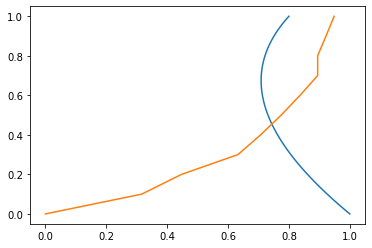

In [4]:
# reads in file
u = []
y = []
with open("laminar_profile.csv", 'r') as file:
    for line in file:
        if line[0] == 'W':
            continue
        line = line.strip()
        data = line.split(',')
        u.append(float(data[1]))
        y.append(float(data[0]))

        
#plotting and finding some things
u=np.array(u)
y=np.array(y)
u_inf = np.array(u[-1])
delta = np.interp(0.99,u/u_inf,y)


# curve fitting
def func(x, a, b):
    return a**x + b*x

u=u[np.where(u<u_inf)]
y=y[:11]
popt, pcov = curve_fit(func,u/u_inf,y/delta)

print(popt)
x=np.linspace(0,1)
plt.plot(func(x, 2.5, -1.7), x)
plt.plot(u/u_inf, y/max(y))

# all the stuff above this is useless

In [132]:
'''
functions to use later, might have confused momentum and displacement thickness
'''

def re(U, l, nu): # reynolds number for nu
    return (U*l)/nu

def re2(U, l, rho, mu): # reynolds number for mu and rho
    return (rho * U * l)/(mu)

def theta_lam(x, re_x): # momentum thickness for laminar flow
    top = 0.664 * x
    bottom = np.sqrt(re_x)
    return top/bottom

def theta_turb(x, re_x):# momentum thickness for turbulent flow
    top = 0.0037 * x
    bottom = re_x**0.2
    return top/bottom

def virtual_origin(x_t, re_xt): # finds the virtual origin from the transition point and the reynolds number
    return x_t * (1-38.22 * re_xt**(-3/8))

def drag(rho, U, theta_x): # drag from density, velocity and momentum thickness
    return rho * (U**2) * theta_x

def C_F(L, re_L):
    return (2 * theta_turb(L, re_L))/L

def U_tau(U_inf, C_F):
    frac = C_F / 2
    part = np.sqrt(frac)
    return U_inf * part

In [45]:
'''
setting up values for q1, calculations in the box below
'''
U_inf = 59
chord = 1
nu = 1.529e-5
rho = 1.19
span = 16.9
mu = rho * nu

In [46]:
'''
actual calculations for q1
'''
reynolds = re(U_inf, chord, nu) # using re2 gives the same answer
drag = (U_inf ** 2) * rho * theta_lam(chord, reynolds) * 2
drag * span 

47.32749313996018

In [47]:
span = 3.4
chord = 1.0
U_inf = 6.3
nu = 1.01e-6
rho = 1000

In [48]:
reynolds = re(U_inf, chord, nu)
drag = (U_inf ** 2) * rho * theta_turb(chord, reynolds) * 2
drag * span 

43.69058910080194

In [114]:
chord = 4
U_inf = 6
rho = 1.2
nu = 1.48e-5
x_t = chord * 0.3
re_xt = re(U_inf, x_t, nu)
x_0 = virtual_origin(x_t, re_xt)

(U_inf ** 2) * rho * theta_turb(chord - x_0, re(U_inf, chord - x_0, nu)) * 2


0.06031864992180838

In [44]:
re(40, 1.2, 0.000011)

4363636.363636363

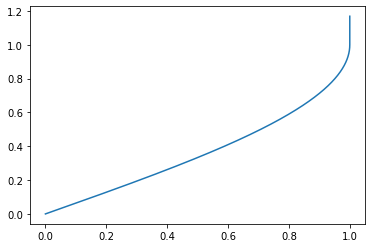

2.143944115339496

In [87]:
delta = 5.9e-3
U = 4
dydelta = delta * 0.001
y = np.arange(0, delta+0.001, dydelta)
u = np.arange(0, delta+0.001, dydelta)
u[np.where(u>=delta)] = U
u[np.where(u<delta)] = 4 * np.sin(np.pi * y[np.where(y<delta)]/(2 * delta))

plt.plot(u/U, y/delta)
plt.show()
frac = u/U
(np.trapz((1-frac))*dydelta)*1e3

In [69]:
dx = 0.01
x = np.arange(-1,1+dx, dx)

np.trapz(x**2)*dx

0.6667000000000013

In [58]:
x

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [ ]:
chord = 4
x_0 = 1
rho = 1.23
U = 6
Re_c = 64e4

In [93]:
laminar = pd.read_excel("LBLdata1.xlsx")
aa, ab = laminar.columns
y=laminar[aa]
u=laminar[ab]

delta: 1.4863636363636374


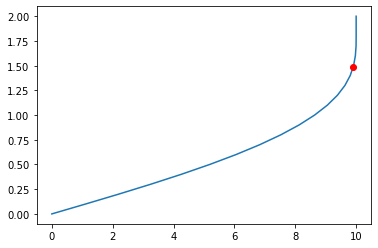

displacement thickness: 0.5409499999999999


In [112]:
U_inf = u.max()
delta = np.interp(0.99*U_inf, u, y)
print(f"delta: {delta}")
plt.plot(u, y)
plt.plot(0.99*U_inf, delta, "ro")
plt.show()
delta_star = np.trapz(1-(u/U_inf), y)
print(f"displacement thickness: {delta_star}")

# q4

In [113]:
u = 6
chord = 4
x_t = 1
nu = 3.75e-5
rho = 1.23
re_c = 64e4

In [120]:
x_o = virtual_origin(1, re(u, x_t, nu))
drag(rho, u, x_o)

31.03469822371708

# q6


In [122]:
chord = 3
U = 6
rho = 1.2
nu = 1.48e-5
x_t = 0.7 * chord

In [123]:
x_o = virtual_origin(1, re(u, x_t, nu))
x_o * 0.3

0.2315109525128017

# q5

In [124]:
U = 98
nu = 0.000013
x = 1
y.plus = 5

In [133]:
reynolds = re(U, x, nu)
coefficient = C_F(x, reynolds)
U_t = U_tau(U, coefficient)

In [134]:
l = nu / U_t

In [135]:
5 * l

5.3126926430504054e-05

# q8

In [149]:
chord = 0.5
re_t = 3e5
rho = 1.225
nu = 1.5e-5

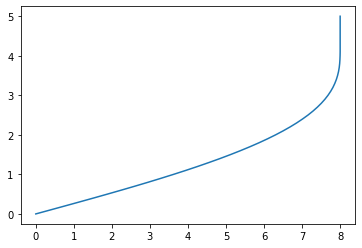

In [150]:
laminar = pd.read_excel("LBLdata2.xlsx")
aa, ab = laminar.columns
y=laminar[aa]
u=laminar[ab]
plt.plot(u, y)

In [152]:
U_inf = u.max()
frac = u/U_inf

theta = np.trapz(frac * (1-frac), y)
print(theta)
drag(rho, U_inf, theta)

0.492929975


38.645710040000004